In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp /content/drive/MyDrive/NAMS/GALLUP.csv .

In [3]:
#hide
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 7.6MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 1.1MB 11.3MB/s 
     |████████████████████████████████| 194kB 27.9MB/s 
     |████████████████████████████████| 204.2MB 81kB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 204kB 51.8MB/s 
Mounted at /content/gdrive


In [5]:
#hide
from fastbook import *
# from kaggle import api
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [8]:
path = Path('/content')
path

Path('/content')

In [9]:
#hide
Path.BASE_PATH = path

In [10]:
path.ls()

(#6) [Path('.config'),Path('gdrive'),Path('GALLUP.csv'),Path('.ipynb_checkpoints'),Path('drive'),Path('sample_data')]

In [11]:
df = pd.read_csv(path/'GALLUP.csv', low_memory=False)

In [12]:
df.head()

,WP16,wgt,country,income_2,WP1219,WP1220,year,weo_gdpc_con_ppp
0,4,1.800488,Israel,18042.77108,1.0,15.0,2016,32658.020
1,4,2.360024,Israel,12799.41274,1.0,15.0,2013,31369.909
2,8,1.463117,Israel,22448.93600,1.0,15.0,2015,32038.697
3,5,1.246618,Israel,16853.73974,1.0,15.0,2014,31844.204
4,8,1.800488,Israel,22206.48749,1.0,15.0,2016,32658.020


In [13]:
df.columns

Index(['WP16', 'wgt', 'country', 'income_2', 'WP1219', 'WP1220', 'year',
       'weo_gdpc_con_ppp'],
      dtype='object')

In [14]:
procs = [Categorify, FillMissing]

In [15]:
dep_var = 'WP16'

In [16]:
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)

In [17]:
cont

['wgt', 'income_2', 'WP1219', 'WP1220', 'year', 'weo_gdpc_con_ppp']

In [18]:
cat

['country']

In [19]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var)

In [20]:
len(to.train),len(to.valid)

(1340809, 0)

In [21]:
#hide_output
to.show(3)

,country,WP1219_na,WP1220_na,weo_gdpc_con_ppp_na,wgt,income_2,WP1219,WP1220,year,weo_gdpc_con_ppp,WP16
0,Israel,False,False,False,1.800488,18042.771484,1.0,15.0,2016,32658.019531,4
1,Israel,False,False,False,2.360024,12799.413086,1.0,15.0,2013,31369.908203,4
2,Israel,False,False,False,1.463117,22448.935547,1.0,15.0,2015,32038.697266,8


In [22]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [23]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

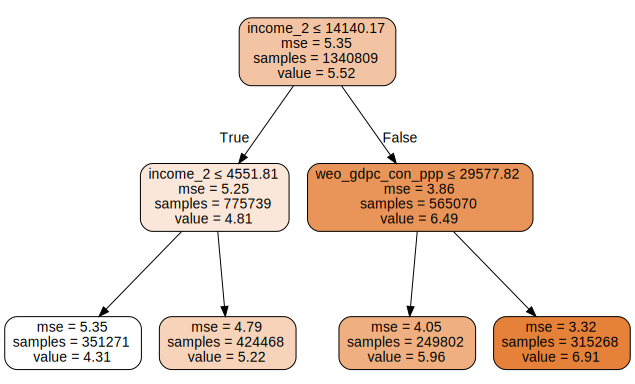

In [24]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

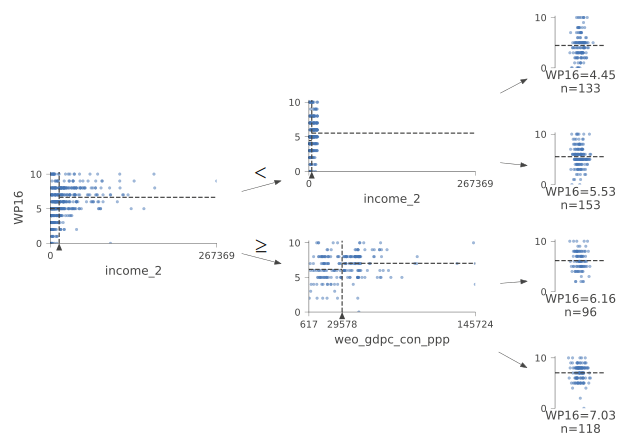

In [25]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')